## lesson 1 复现代码

In [3]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [4]:
another_grammar = """
sentence => noun_phrase adv_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
adv_phrase => adv verb_phrase
verb_phrase => verb noun_phrase
Article => 那个 | 很多
Adj => 俊朗的 | 强大的 | 著名的
noun => 老师 | 手机 | 饭店 
adv => 快乐地 | 紧张地 | 飞快地
veb => 拥抱 | 拿起 | 游泳 
"""

In [5]:
import random

In [6]:
def adj():
    return random.choice('黄色的 | 漂亮的 | 迅捷的 '.split('|')).split()[0]

In [7]:
def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])() #最后的（）是函数执行符号，没有括号的话返回函数内存地址

In [8]:
adj()

'黄色的'

In [9]:
adj_star()

''

## Question 如果更换语法 代码必须重新写

In [10]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [11]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue        #strip()函数去除line头尾指定的形参
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [12]:
grammar = create_grammar(simple_grammar)

In [13]:
grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [14]:
choice = random.choice

In [15]:
def generate(gram, target):
    if target not in gram: return target
    
    expands =[generate(gram, t) for t in choice(gram[target])]
    return ''.join(e if e !='/n' else '\n' for e in expands if e!= 'null')

In [16]:
example_grammar = create_grammar(simple_grammar)

In [17]:
generate(gram=example_grammar, target='sentence')

'一个好看的桌子坐在这个蓝色的小猫'

In [18]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [19]:
for i in range(20):
    print(generate(gram = create_grammar(host, split = '='),target = 'host'))

女士,你好我是3号,您需要打猎吗？
您好我是553号,请问你要打牌吗？
您好我是1号,请问你要打牌吗？
您好我是2号,请问你要打牌吗？
您好我是56号,请问你要打猎吗？
先生,您好我是33735号,请问你要赌博吗？
女士,你好我是9号,请问你要喝酒吗？
先生,您好我是919号,您需要打牌吗？
小朋友,您好我是32号,请问你要喝酒吗？
先生,你好我是62号,请问你要打猎吗？
小朋友,你好我是751252193号,请问你要打猎吗？
您好我是725号,请问你要打牌吗？
您好我是38号,您需要喝酒吗？
你好我是2号,您需要打牌吗？
你好我是34号,您需要打牌吗？
小朋友,您好我是3号,请问你要打牌吗？
你好我是8944号,请问你要打猎吗？
先生,你好我是35号,您需要喝酒吗？
女士,你好我是7号,您需要喝酒吗？
你好我是69号,请问你要赌博吗？


# Data Driven

我们的目的是，希望做一个程序，当输入变了，我们的程序不用变，Generalization
AI

In [20]:
simple_programming = '''
programming => if_stmt | assign | while_loop
while_loop => while ( cond ) { change_line stmt change_line }
if_stmt => if ( cond )  { change_line stmt change_line } | if ( cond )  { change_line stmt change_line } else { change_line stmt change_line } 
change_line => /N
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  var _ num | words 
words => words _ word | word 
word => name | info |  student | lib | database 
nums => nums num | num
num => 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 0
'''

In [21]:
print(generate(gram = create_grammar(simple_programming, split = '=>'), target = 'programming'))

if(name_6_7<=info_database_student){/Nlib_name=lib_lib_7/N}


In [22]:
# 规范打印
def pretty_print(line):
    lines = line.split('/N')
    
    code_lines = []
    for i ,sen in enumerate(lines):
        if i < len(lines)* 1/2:
            code_lines.append(i * " "+ sen)
        else:
            code_lines.append((len(lines) - i) * " "+ sen)
    return code_lines

In [23]:
ab = pretty_print(generate(gram = create_grammar(simple_programming, split = '=>'), target = 'programming'))

In [24]:
ab

['if(lib_6_1_2_4<database_lib_9_8){',
 ' info=info_name_0',
 '  }else{',
 '  name_1=lib',
 ' }']

In [25]:
generated_programming = []
for i in range(20):
    generated_programming += pretty_print(generate(gram = create_grammar(simple_programming, split = '=>'), target = 'programming'))

In [26]:
for line in generated_programming:
    print(line)

if(lib_info_1==info_database_6){
 if(student_database_info_info_lib_name_2>=database_name_0){
  if(info>=student){
   student=info_8
    }else{
     if(info_lib_database_2_0_2_9<info_info){
      if(database<=database_lib_student){
       if(database<database_8_8){
        info_name_name_lib=student_0_8
         }
          }
           }
            }
             }else{
              student=name_lib_name_4
               }
                }else{
                 if(database_lib_student_0<=student){
                  if(name_name>=student_2){
                   database_database=student
                    }else{
                     name=student_8_0
                      }
                       }else{
                        if(student_name_student_6>=info_lib_6){
                         if(name<name_info_9_4){
                          if(lib<=info_8){
                           if(student_lib<=name_name){
                            if(database<=student_4){
                     

# Language Model

$$language\_model(string) = probability(string) \in (0,1)$$

$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$ 

$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$ 

how to get $ Pr(w1 | w2 w3 w4) $ ?

In [27]:
import random

In [28]:
random.choice(range(100))

80

In [29]:
filename = r'C:\Users\aceryoung\Downloads\NLP\02\assignment\export_sql_1558435\sqlResult_1558435.csv'

In [30]:
import pandas as pd
content = pd.read_csv(filename, encoding = 'gb18030')

In [31]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [32]:
articles = content['content'].tolist()

In [33]:
len(articles)
articles[0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [34]:
import re 

In [35]:
def token(string):
    return re.findall('\w+',string)

In [36]:
from collections import Counter
import jieba

In [37]:
with_jieba_cut = Counter(jieba.cut(articles[0]))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ACERYO~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.190 seconds.
Prefix dict has been built successfully.


In [38]:
with_jieba_cut.most_common()[:10]

[('，', 9),
 ('。', 4),
 ('MIUI', 3),
 (' ', 3),
 ('\r\n', 3),
 ('（', 2),
 ('6', 2),
 ('月', 2),
 ('）', 2),
 ('机型', 2)]

In [39]:
token((articles[0]))

['此外',
 '自本周',
 '6月12日',
 '起',
 '除小米手机6等15款机型外',
 '其余机型已暂停更新发布',
 '含开发版',
 '体验版内测',
 '稳定版暂不受影响',
 '以确保工程师可以集中全部精力进行系统优化工作',
 '有人猜测这也是将精力主要用到MIUI',
 '9的研发之中',
 'MIUI',
 '8去年5月发布',
 '距今已有一年有余',
 '也是时候更新换代了',
 '当然',
 '关于MIUI',
 '9的确切信息',
 '我们还是等待官方消息']

In [40]:
''.join(token(articles[0]))

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息'

In [41]:
articles_clean = [''.join(token(str(a)))for a in articles]

In [42]:
len(articles_clean)

89611

In [43]:
with open('article_9k.txt', 'w') as f:
    for a in articles_clean:
        f.write(a+ '\n')

In [44]:
!dir

 驱动器 C 中的卷是 Acer
 卷的序列号是 BA06-64FD

 C:\Users\aceryoung\Downloads\NLP\02\Lecture-01-Syntax-Tree-and-Language-Model.ipynb课程在线准备代码 的目录

2020-01-14  00:51    <DIR>          .
2020-01-14  00:51    <DIR>          ..
2020-01-14  00:51    <DIR>          .ipynb_checkpoints
2020-01-14  00:53        64,368,892 article_9k.txt
2020-01-12  00:40            73,874 Lecture-01-Syntax-Tree-and-Language-Model.ipynb课程在线准备代码.ipynb
2020-01-14  00:51           139,756 recall.ipynb
2020-01-11  22:44           137,948 复现.ipynb
               4 个文件     64,720,470 字节
               3 个目录 46,456,905,728 可用字节


In [45]:
def cut(string): return list(jieba.cut(string))

In [46]:
TOKEN = []

In [47]:
for i, line in enumerate(open('article_9k.txt')):
    if i%1000 == 0:
        print(i)
    if i > 20000:
        break
    TOKEN += cut(line)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000


In [48]:
from functools import reduce

In [49]:
from operator import add, mul

In [50]:
reduce(add, [1,2,3,4,5,6]) #reduce 累加操作

21

In [51]:
[1, 2, 3] + [3, 43, 5]

[1, 2, 3, 3, 43, 5]

type markdown and LaTex 

In [52]:
from collections import Counter

In [53]:
words_count = Counter(TOKEN)

In [54]:
words_count.most_common()

[('的', 246239),
 ('在', 72534),
 ('了', 46735),
 ('n', 43990),
 ('和', 43014),
 ('是', 39085),
 ('月', 38415),
 ('日', 30119),
 ('年', 28051),
 ('也', 20004),
 ('\n', 20001),
 ('将', 19690),
 ('为', 19681),
 ('等', 19509),
 ('有', 18748),
 ('中', 18223),
 ('与', 18188),
 ('对', 17961),
 ('中国', 17369),
 ('新华社', 16255),
 ('上', 14566),
 ('他', 12888),
 ('6', 12775),
 ('不', 12589),
 ('发展', 12058),
 ('记者', 12032),
 ('１', 11700),
 ('都', 11626),
 ('4', 11570),
 ('０', 11502),
 ('到', 11034),
 ('就', 10899),
 ('说', 10766),
 ('企业', 10528),
 ('外代', 10510),
 ('人', 10381),
 ('从', 9976),
 ('被', 9891),
 ('2017', 9861),
 ('并', 9826),
 ('但', 9782),
 ('这', 9720),
 ('后', 9565),
 ('市场', 9498),
 ('以', 9283),
 ('２', 9182),
 ('一个', 8744),
 ('3', 8650),
 ('新', 8532),
 ('要', 8423),
 ('表示', 8298),
 ('公司', 8227),
 ('个', 8149),
 ('还', 8115),
 ('我', 8104),
 ('二线', 8020),
 ('5', 7936),
 ('进行', 7846),
 ('我们', 7679),
 ('会', 7653),
 ('工作', 7445),
 ('而', 7438),
 ('1', 7385),
 ('美国', 7259),
 ('国家', 6681),
 ('经济', 6447),
 ('2', 6413),
 ('

In [55]:
frequences = [f for w, f in words_count.most_common(100)]

In [56]:
x = [i for i in range(100)]

In [57]:
%matplotlib inline

In [58]:
import matplotlib.pyplot as plt

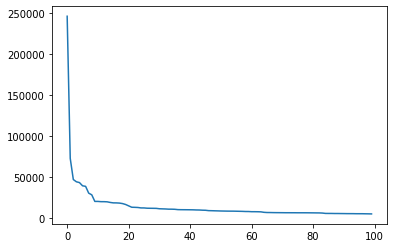

In [59]:
plt.plot(x, frequences)

In [60]:


import numpy as np

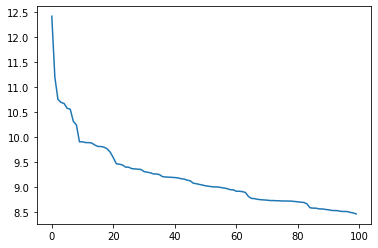

In [61]:
plt.plot(x, np.log(frequences))

In [62]:
def pro_1(word):
    return words_count[word]/len(TOKEN)

In [63]:
pro_1('我们')

0.0014289558294661522

In [64]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [65]:
TOKEN = [str(t) for t in TOKEN]

In [79]:
words_count = Counter(TOKEN)

In [80]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [81]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [82]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [83]:
words_count_2

Counter({'此外自': 2,
         '自本周': 2,
         '本周6': 3,
         '6月': 8840,
         '月12': 476,
         '12日起': 3,
         '日起除': 1,
         '除小米': 1,
         '小米手机': 4,
         '手机6': 1,
         '6等': 1,
         '等15': 22,
         '15款': 5,
         '款机型': 1,
         '机型外': 1,
         '外其余': 19,
         '其余机型': 1,
         '机型已': 1,
         '已暂停': 5,
         '暂停更新': 1,
         '更新发布': 1,
         '发布含': 1,
         '含开发': 1,
         '开发版': 1,
         '版体验版': 1,
         '体验版内测': 1,
         '内测稳定版': 1,
         '稳定版暂不受': 1,
         '暂不受影响': 1,
         '影响以': 8,
         '以确保': 30,
         '确保工程师': 1,
         '工程师可以': 1,
         '可以集中': 1,
         '集中全部': 1,
         '全部精力': 2,
         '精力进行': 1,
         '进行系统优化': 1,
         '系统优化工作': 1,
         '工作有人': 1,
         '有人猜测': 2,
         '猜测这': 2,
         '这也': 661,
         '也是': 2710,
         '是将': 52,
         '将精力': 5,
         '精力主要': 1,
         '主要用到': 1,
         '用到MIUI9': 1,
         'MIUI9的': 2,
 

In [84]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / words_count[word2]
    else:
        return 1 / len(TOKEN_2_GRAM)

In [85]:
prob_2("其余","机型")

0.01639344262295082

In [86]:
prob_2('月', "2344")

1.860862561901593e-07

In [87]:
def probability(sentence):
    sen_probability = 1
    words = cut(sentence)
    for i ,word in enumerate(words[:-1]):
        next = words[i + 1]
        
        probability = prob_2(word, next)
        sen_probability *= probability
    return sen_probability

In [88]:
probability('小米手机好用么')

1.1252021037488092e-16

In [89]:
probability('小米手机卖完了')

7.762922318135974e-14

In [90]:
for sen in [generate(gram = example_grammar, target = 'sentence') for i in range(10)]:
    print('sentence: {} with Pro {}'.format(sen, probability(sen)))

sentence: 这个篮球坐在一个桌子 with Pro 7.425397717621284e-19
sentence: 一个小小的小猫看着一个蓝色的小猫 with Pro 1.6665124498308794e-33
sentence: 这个蓝色的好看的好看的篮球坐在一个好看的蓝色的小小的桌子 with Pro 2.0616834080266212e-60
sentence: 这个女人听着一个蓝色的小猫 with Pro 1.2959351156284032e-25
sentence: 一个桌子坐在一个小猫 with Pro 7.425397717621285e-19
sentence: 这个小猫看见这个女人 with Pro 5.224004094780928e-19
sentence: 一个小小的蓝色的好看的篮球看见一个小猫 with Pro 1.9934476062227078e-32
sentence: 这个蓝色的蓝色的好看的蓝色的女人看见这个蓝色的篮球 with Pro 1.03139328073152e-51
sentence: 这个女人听着一个好看的桌子 with Pro 1.1965310016455429e-25
sentence: 这个好看的好看的蓝色的小猫听着这个小猫 with Pro 3.531759358355202e-42


In [91]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = probability(s1), probability(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probability {}'.format(s1, p1))
    print('-'*4 + ' {} with probability {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probability 1.973107582886324e-45
---- 明天晚上请你吃大餐，我们一起吃苹果 with probability 1.7200350885595995e-45
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probability 6.803923231176511e-26
---- 真是一只好看的小猫 with probability 3.6563276463704355e-19
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probability 7.077149307534156e-13
---- 今晚火锅去吃我 with probability 1.6702136754537718e-19
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probability 1.0821279607146751e-15
---- 养乐多绿来一杯 with probability 3.4628094742869604e-14
